## Question 1:
write the output inside the readme????

In [3]:
#function 1
def temp_tester(normal_temp):    
    
    def embedded_tester(test_temp):
      if abs(normal_temp - test_temp) <=1.0:
        return (True)
      else:
        return(False)
  
    return embedded_tester

In [5]:
human_tester = temp_tester(37)
chicken_tester = temp_tester(41.1)

chicken_tester(42) # True -- i.e. not a fever for a chicken


True

In [6]:
human_tester(42)   # False -- this would be a severe fever for a human


False

In [7]:
chicken_tester(43) # False

False

In [8]:
human_tester(35)   # False -- too low

False

In [9]:
human_tester(98.6) # False -- normal in degrees F but our reference temp was in degrees C

False

## Question 2:

In [10]:
import pandas as pd
import sqlite3
with sqlite3.connect("hw1-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population", db)

### Examine data. What columns does it have? (2 points) How many rows (think: people) does it have? (2 points)

The dataset contains 4 columns and 152361 rows.



In [11]:
data

,name,age,weight,eyecolor
0,Edna Phelps,88.895690,67.122450,brown
1,Cara Yasso,9.274597,29.251244,brown
2,Gail Rave,18.345613,55.347903,brown
3,Richard Adams,16.367545,70.352184,brown
4,Krista Slater,49.971604,70.563859,brown
...,...,...,...,...
152356,John Fowler,23.930833,71.532569,blue
152357,Diana Shuffler,21.884819,67.936753,brown
152358,Kevin Cuningham,87.705907,60.074646,brown
152359,James Libengood,21.727666,81.774985,brown


### Examine the distribution of the ages in the dataset. In particular, be sure to have your code report the mean, standard deviation, minimum, maximum. (2 points) Plot a histogram of the distribution with an appropriate number of bins for the size of the dataset (describe in your readme the role of the number of bins). (3 points) Comment on any outliers or patterns you notice in the distribution of ages. (1 point)

In [13]:
data['age'].describe()

count    152361.000000
mean         39.510528
std          24.152760
min           0.000748
25%          19.296458
50%          38.468955
75%          57.623245
max          99.991547
Name: age, dtype: float64

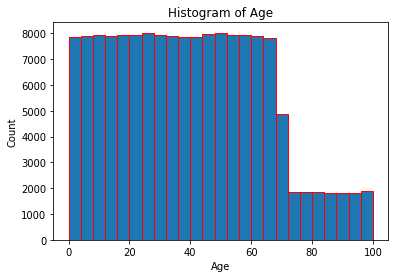

In [20]:
import matplotlib.pyplot as plt
plt.hist(data['age'], edgecolor="red", bins=25)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

I noticed in the produced histogram, there is a decrease in number of participants around 70 year old to 100 year old participants. No significant outlier is spotted inside the dataset. The distribution is more uniform, not normal. This indicates a sufficient number of participants in each age classes. 
The bin number is chosen to be 25. The reason why I used 25 to be the bin number is because our age ranges from 0 to 100. Picking 25, which is a relatively big divident of 100, enables us to see the change in distribution in a relatively small scale.

### Repeat the above for the distribution of weights. (3 points)

In [21]:
data['weight'].describe()

count    152361.000000
mean         60.884134
std          18.411824
min           3.382084
25%          58.300135
50%          68.000000
75%          71.529860
max         100.435793
Name: weight, dtype: float64

### Make a scatterplot of the weights vs the ages. (3 points) Describe the general relationship between the two variables (3 points). You should notice at least one outlier that does not follow the general relationship. What is the name of the person? (3 points) Be sure to explain your process for identifying the person whose values don't follow the usual relationship in the readme. (3 points)

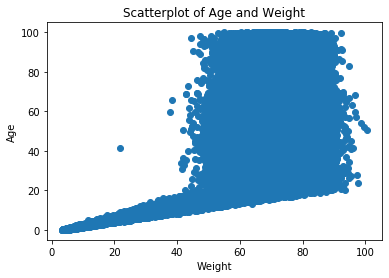

In [23]:
plt.scatter(data['weight'],data['age'])
plt.title('Scatterplot of Age and Weight')
plt.xlabel('Weight')
plt.ylabel('Age')
plt.show()

In [28]:
df_sub = data.loc[(data['weight']>=40)&(data['weight']<=45)&(data['age']>=20)&(data['age']<=23)]

In [29]:
df_sub

,name,age,weight,eyecolor
2487,Charles Portillo,22.28086,44.340342,brown
